Question 1: What is Deep Learning? Explain its evolution and how it differs from traditional machine learning

Answer:

- Deep Learning is a subfield of Machine Learning that focuses on using artificial neural networks with multiple hidden layers to learn patterns directly from data. These networks are inspired by the structure and working of the human brain. Deep learning models are capable of automatically extracting features from raw data such as images, text, and audio without manual feature engineering.
- The evolution of deep learning began with the introduction of the perceptron in the 1950s. In the 1980s, the backpropagation algorithm made it possible to train multi-layer neural networks. However, deep learning did not gain popularity until after 2010 due to the availability of large datasets, powerful GPUs, and improved optimization techniques. These advancements led to major breakthroughs in image recognition, speech recognition, and natural language processing.
- Traditional machine learning algorithms require manual feature extraction and work well on small to medium-sized datasets. In contrast, deep learning automatically learns complex features and performs better with large datasets. Deep learning models are more computationally intensive but provide higher accuracy for complex tasks.

Question 2: Explain the architecture and functioning of a Perceptron. What are its limitations?

Answer:

- A perceptron is the simplest form of an artificial neural network used for binary classification problems. It consists of input nodes, associated weights, a bias term, and an activation function. Each input is multiplied by its corresponding weight, and all weighted inputs are summed together with the bias. This value is then passed through an activation function, usually a step function, to produce the final output.
- The functioning of a perceptron involves adjusting weights during training based on the prediction error. If the predicted output differs from the actual output, the weights and bias are updated using a learning rule.
- The main limitation of a perceptron is that it can only solve linearly separable problems. It cannot learn non-linear relationships such as the XOR problem. Additionally, it supports only binary classification and does not have hidden layers, which limits its learning capability.

Question 3: Explain the purpose of activation functions. Compare Sigmoid, ReLU, and Tanh

Answer:

- Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns and relationships in data. Without activation functions, a neural network would behave like a simple linear model regardless of the number of layers.
The sigmoid activation function produces output values between 0 and 1, making it useful for binary classification problems. However, it suffers from the vanishing gradient problem, which slows down learning in deep networks.
- The tanh activation function outputs values between -1 and 1 and is zero-centered, which helps in faster convergence compared to sigmoid. Despite this advantage, tanh also suffers from the vanishing gradient problem.
- The ReLU activation function outputs zero for negative inputs and the input value itself for positive inputs. It is computationally efficient and widely used in deep learning. However, ReLU can suffer from the dead neuron problem when neurons stop updating.

Question 4: Difference between Loss function and Cost function

Answer:

- A loss function measures the error between the predicted output and the actual output for a single training example. It helps evaluate how well the model is performing on individual data points.
- A cost function, on the other hand, represents the average loss over the entire training dataset. The goal of training a neural network is to minimize the cost function, which leads to better overall model performance.
- Examples of commonly used loss functions include Mean Squared Error and Binary Cross-Entropy. The cost function is calculated by averaging these losses across all training samples.

Question 5: Role of optimizers and comparison of Gradient Descent, Adam, and RMSprop

Answer:

- Optimizers play a crucial role in neural networks by updating the model’s weights in order to minimize the loss or cost function. They determine how fast and how accurately a model converges to the optimal solution.
- Gradient Descent updates weights using the gradient of the loss function and a fixed learning rate. Although simple, it can be slow and may get stuck in local minima.
- RMSprop adapts the learning rate for each parameter by using a moving average of squared gradients. This helps improve convergence, especially for non-stationary problems.
- Adam optimizer combines the advantages of both momentum and RMSprop. It adjusts learning rates dynamically and converges faster, making it one of the most widely used optimizers in deep learning.

In [1]:
# Question 6: Single-layer perceptron for AND gate using NumPy
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

weights = np.zeros(2)
bias = 0
learning_rate = 0.1

for epoch in range(10):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

for i in X:
    output = np.dot(i, weights) + bias
    print(i, "->", 1 if output >= 0 else 0)


[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


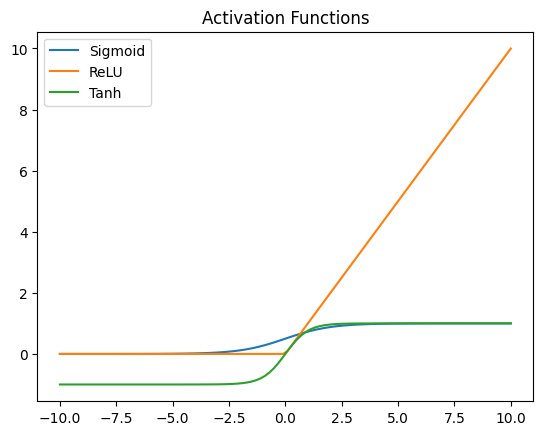

In [2]:
# Question 7: Implementation and visualization of activation functions
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.show()


In [3]:
# Question 8: Multilayer Neural Network using MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8784 - loss: 0.4280
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9635 - loss: 0.1248
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9768 - loss: 0.0765
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9823 - loss: 0.0583
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0437
Training Accuracy: 0.9857000112533569


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7687 - loss: 0.8195 - val_accuracy: 0.8458 - val_loss: 0.4321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8620 - loss: 0.3809 - val_accuracy: 0.8533 - val_loss: 0.4095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8760 - loss: 0.3384 - val_accuracy: 0.8653 - val_loss: 0.3750
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8850 - loss: 0.3143 - val_accuracy: 0.8719 - val_loss: 0.3611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8898 - loss: 0.2985 - val_accuracy: 0.8722 - val_loss: 0.3556


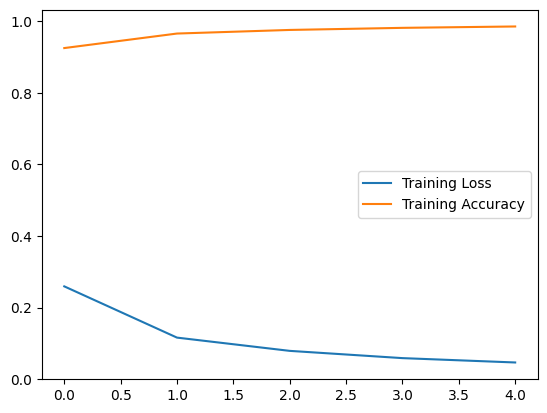

In [4]:
# Question 9: Loss and accuracy visualization for Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()


Interpretation:
- As training progresses, the loss decreases and accuracy increases, showing effective learning. If validation accuracy decreases while training accuracy increases, it indicates overfitting.


Question 10: Fraud Detection – Real-time Data Science Workflow

Answer:

- For fraud detection in a banking system, a multilayer neural network is suitable due to its ability to capture complex patterns in structured data. Input features such as transaction amount, merchant ID, and customer location are fed into the network, followed by multiple hidden layers using the ReLU activation function. The output layer uses a sigmoid activation function to classify transactions as fraudulent or legitimate.
- Binary cross-entropy is chosen as the loss function since it is well suited for binary classification tasks. Due to class imbalance, techniques such as class weighting, oversampling, or SMOTE are used. - - - Evaluation should focus on precision, recall, F1-score, and AUC rather than accuracy alone.
- The Adam optimizer is preferred because of its fast convergence and adaptive learning rate. Overfitting can be prevented using dropout layers, L2 regularization, and early stopping during training.